In [6]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 

import antidistil
import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
reload(antidistil)
reload(pipeline)
reload(consts)
plot.prepare_for_plots()

Using cuda device


<Figure size 864x720 with 0 Axes>

In [9]:
train_dataloader, test_dataloader = pipeline.get_data()

In [14]:
reload(pipeline)
reload(antidistil)
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_5cl_{i}.pt'))
    model = antidistil.simple_baseline_change_weights(teacher, 'uniform')

    mask = torch.tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=torch.float).to(consts.device)
    
    loss_fn = antidistil.altidistill_loss
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.student_5_antidistil_learning_rate)
    lambdas = [1, 1, 1, 0]
    
    for epoch in range(consts.student_5_antidistil_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.antidistil_loop(teacher, model, lambdas, mask, train_dataloader, loss_fn, optimizer, noise_dist='uniform', noise_eps=1e-1)

    optimizer = torch.optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)    

    mask = torch.ones(10).to(consts.device)

    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model, history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)

    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/lambdas_{i}.pt')

Model 5
-------------------------------
-------------------------------
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1
-------------------------------


Train Loss: 1.4045948693092833
Train Acc: 0.7574
Epoch 2
-------------------------------


Train Loss: 1.3987518193873953
Train Acc: 0.7572
Epoch 3
-------------------------------


Train Loss: 1.3963250193190067
Train Acc: 0.7574666666666666
Epoch 4
-------------------------------


Train Loss: 1.394534983533494
Train Acc: 0.7578
Epoch 5
-------------------------------


Train Loss: 1.3926606137701805
Train Acc: 0.7578
Epoch 6
-------------------------------


Train Loss: 1.3896408131782045
Train Acc: 0.7583333333333333
Epoch 7
-------------------------------


Train Loss: 1.3864166952194052
Train Acc: 0.7587
Epoch 8
-------------------------------


Train Loss: 1.3820572142905376
Train Acc: 0.759
Epoch 9
-------------------------------


Train Loss: 1.3769261352559354
Train Acc: 0.7599
Epoch 10
-------------------------------


Train Loss: 1.3708342542039587
Train Acc: 0.7603
Epoch 11
-------------------------------


Train Loss: 1.3656533104308108
Train Acc: 0.7612333333333333
Epoch 12
-------------------------------


Train Loss: 1.3586594345721792
Train Acc: 0.7620333333333333
Epoch 13
-------------------------------


Train Loss: 1.3524096920135174
Train Acc: 0.7627666666666667
Epoch 14
-------------------------------


Train Loss: 1.3457898058789841
Train Acc: 0.7635
Epoch 15
-------------------------------


Train Loss: 1.338750896555312
Train Acc: 0.7647333333333334
Epoch 16
-------------------------------


Train Loss: 1.3326577009038723
Train Acc: 0.7655
Epoch 17
-------------------------------


Train Loss: 1.3256888704097016
Train Acc: 0.7663666666666666
Epoch 18
-------------------------------


Train Loss: 1.318901867562152
Train Acc: 0.7669666666666667
Epoch 19
-------------------------------


Train Loss: 1.312413321403747
Train Acc: 0.7673
Epoch 20
-------------------------------


Train Loss: 1.3054496945218836
Train Acc: 0.7682
Epoch 1
-------------------------------


Validation accuracy: 64.1%, Validation loss: 1.149835 

Epoch 2
-------------------------------


Validation accuracy: 64.9%, Validation loss: 1.057749 

Epoch 3
-------------------------------


Validation accuracy: 65.3%, Validation loss: 1.021984 

Epoch 4
-------------------------------


Validation accuracy: 65.4%, Validation loss: 1.003148 

Epoch 5
-------------------------------


Validation accuracy: 72.8%, Validation loss: 0.892689 

Epoch 6
-------------------------------


Validation accuracy: 73.9%, Validation loss: 0.781276 

Epoch 7
-------------------------------


Validation accuracy: 74.1%, Validation loss: 0.763746 

Epoch 8
-------------------------------


Validation accuracy: 74.2%, Validation loss: 0.753682 

Epoch 9
-------------------------------


Validation accuracy: 74.5%, Validation loss: 0.746215 

Epoch 10
-------------------------------


Validation accuracy: 74.7%, Validation loss: 0.740870 

Epoch 11
-------------------------------


Validation accuracy: 74.7%, Validation loss: 0.737520 

Epoch 12
-------------------------------


Validation accuracy: 74.8%, Validation loss: 0.733753 

Epoch 13
-------------------------------


Validation accuracy: 74.9%, Validation loss: 0.730918 

Epoch 14
-------------------------------


Validation accuracy: 74.9%, Validation loss: 0.728293 

Epoch 15
-------------------------------


Validation accuracy: 75.0%, Validation loss: 0.725784 

Epoch 16
-------------------------------


Validation accuracy: 75.2%, Validation loss: 0.723733 

Epoch 17
-------------------------------


Validation accuracy: 75.2%, Validation loss: 0.721818 

Epoch 18
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.720119 

Epoch 19
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.718960 

Epoch 20
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.717504 

Epoch 21
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.716563 

Epoch 22
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.715329 

Epoch 23
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.714767 

Epoch 24
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.714481 

Epoch 25
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.713950 

Epoch 26
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.713258 

Epoch 27
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.712853 

Epoch 28
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.712003 

Epoch 29
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.712044 

Epoch 30
-------------------------------


Validation accuracy: 75.3%, Validation loss: 0.711583 



FSGM Accuracy [0.753, 0.7402, 0.7228, 0.6991, 0.6747, 0.6454, 0.6118, 0.5785, 0.5409, 0.5025]


Noise Accuracy [0.753, 0.749, 0.7239, 0.6782, 0.6306, 0.5517, 0.4785, 0.4288, 0.3673, 0.3325]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


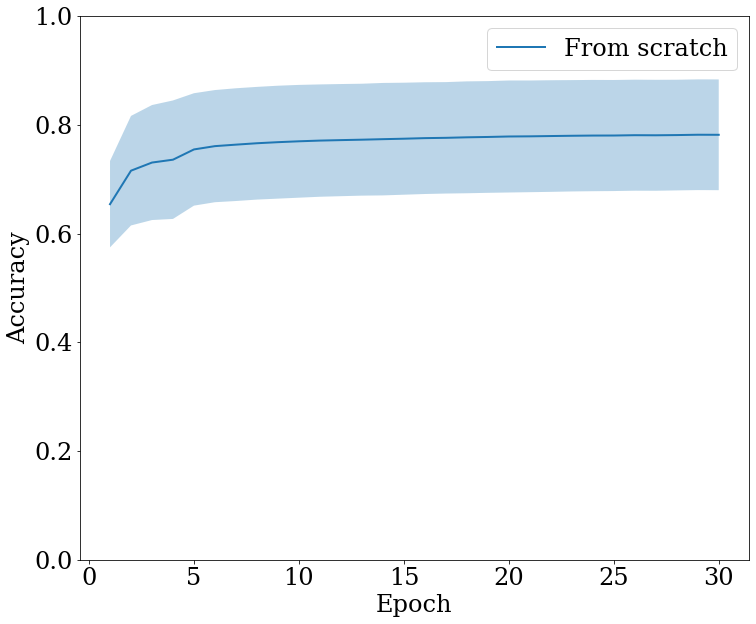

In [15]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs + 1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

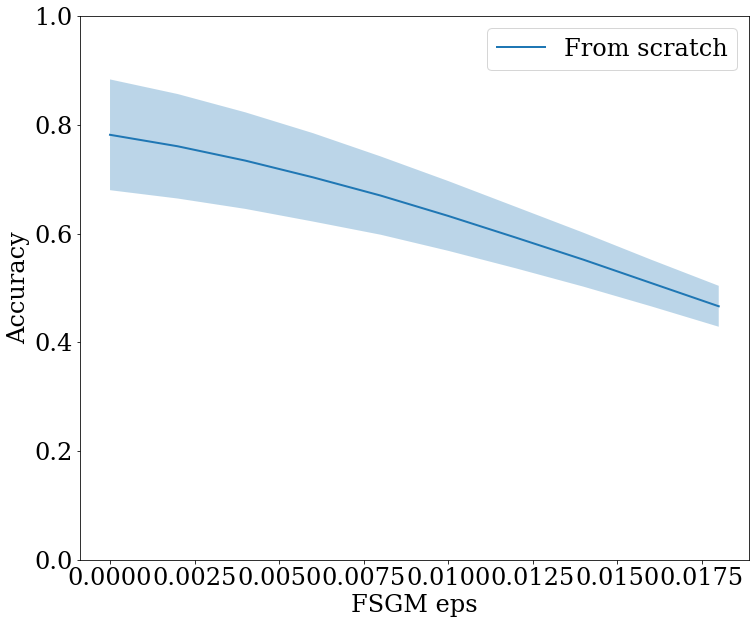

In [16]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

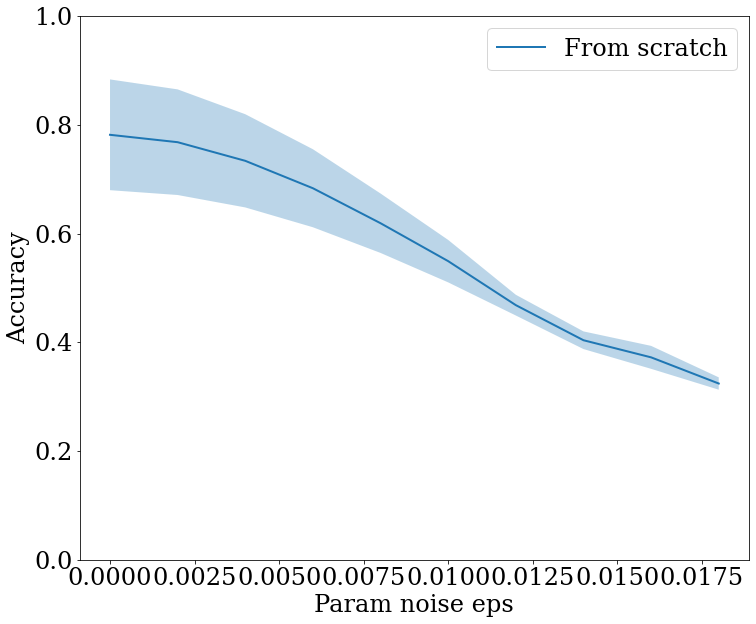

In [17]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [18]:
with open(pipeline.get_path()+'/history_antidistil.json', 'w') as out:
    out.write(json.dumps(history))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
